# Group 6
- GIL GUZMAN, ALEXSANDER GERARDO
- SALMÓN SALAZAR, GISELLA VELDA
- CIRIACO RUIZ, MAYTE JULIA
- ARAUCO ALIAGA, ROXANA PATRICIA
- VILLACORTA BARRERA, ANDRES ALEXANDER

In [1]:
# We import the necessary libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

1. Import the data located at this link. It has information on people infected with dengue at the district level for 2015 to 2021.ters.

In [2]:
# We import the database
# We modified the format of the 'Ubigeo' and 'Casos' columns 
#to avoid loss of information

df = pd.read_csv('../../_data/data_dengue_peru.csv', 
                 dtype={'Ubigeo': 'str'}, 
                 converters={'Casos': lambda x: float(x.replace(',', '')) if x != '' else np.nan})

df

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0.0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0
...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN


2. Generate ubigeo for Departments and Provinces taking the first two and four numbers. Hint: Use this code.

In [3]:
# We generate the requested columns

df['Departamento_Ubigeo'] = df['Ubigeo'].str[:2]
df['Provincia_Ubigeo'] = df['Ubigeo'].str[:4]
df

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,Departamento_Ubigeo,Provincia_Ubigeo
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08,0809
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0.0,08,0809
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08,0809
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703


3. Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile.

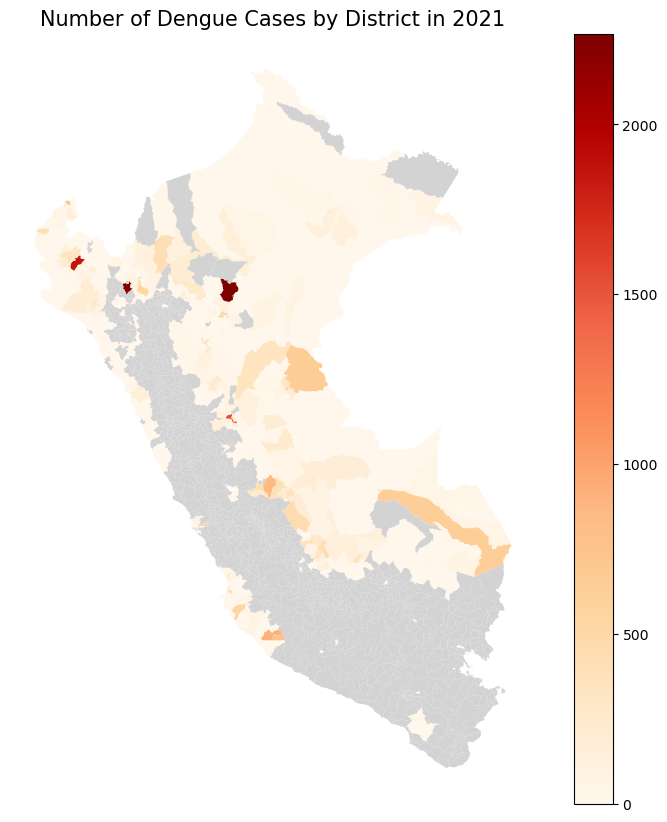

In [4]:
 # Filter the data for 2021
df_2021 = df[df['Año'] == 2021]


# Aggregate the number of cases by district (Ubigeo)
cases_by_district = df_2021.groupby('Ubigeo')['Casos'].sum().reset_index()


# Load the shapefile for Peruvian districts
# Make sure this file contains the geometry for each district
districts_gdf = gpd.read_file('../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')


# Merge your cases data with the districts geodataframe using the Ubigeo column
merged_gdf = districts_gdf.merge(cases_by_district, left_on='CODIGO', right_on='Ubigeo', how='left')


# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))


# Plot the map, specifying a color for NaN values
merged_gdf.plot(column='Casos', cmap='OrRd', legend=True,
               missing_kwds={"color": "lightgrey", "label": "No data"},
               ax=ax)


# Add a title and adjust the legend
ax.set_title('Number of Dengue Cases by District in 2021', fontsize=15)
ax.set_axis_off()  # Turn off the axis


plt.show()

4. Use geopandas to plot the number of cases in 2021 by the province using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the province level.

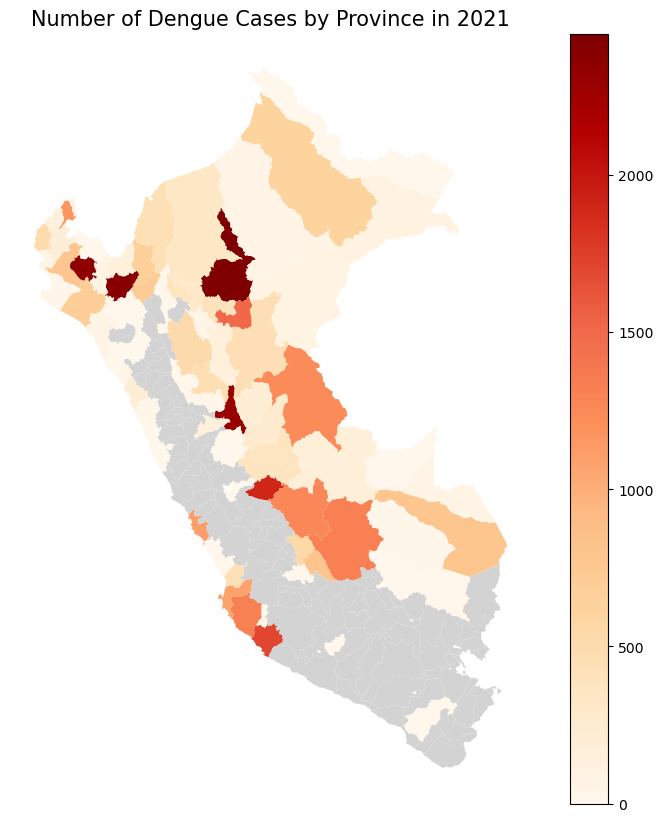

In [5]:
# Aggregate the number of cases by province
cases_by_province = df_2021.groupby('Provincia_Ubigeo')['Casos'].sum().reset_index()

# Aggregate the shapefile data to the province level using the 'Provincia_Ubigeo' column
# We'll use the dissolve method to aggregate geometries based on province code (Ubigeo)
provinces_gdf = districts_gdf.dissolve(by='IDPROV')

# Merge the aggregated cases data with the provinces geodataframe
merged_gdf = provinces_gdf.merge(cases_by_province, left_on='IDPROV', right_on='Provincia_Ubigeo', how='left')

# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the map with a continuous color scale for the number of cases
merged_gdf.plot(column='Casos', cmap='OrRd', legend=True, 
                missing_kwds={"color": "lightgrey", "label": "No data"},
                ax=ax)

# Add a title and adjust the legend
ax.set_title('Number of Dengue Cases by Province in 2021', fontsize=15)
ax.set_axis_off()  # Turn off the axis

plt.show()

5. Use geopandas to plot the number of cases by the department for all the years using subplots. Every subplot for each year. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level.

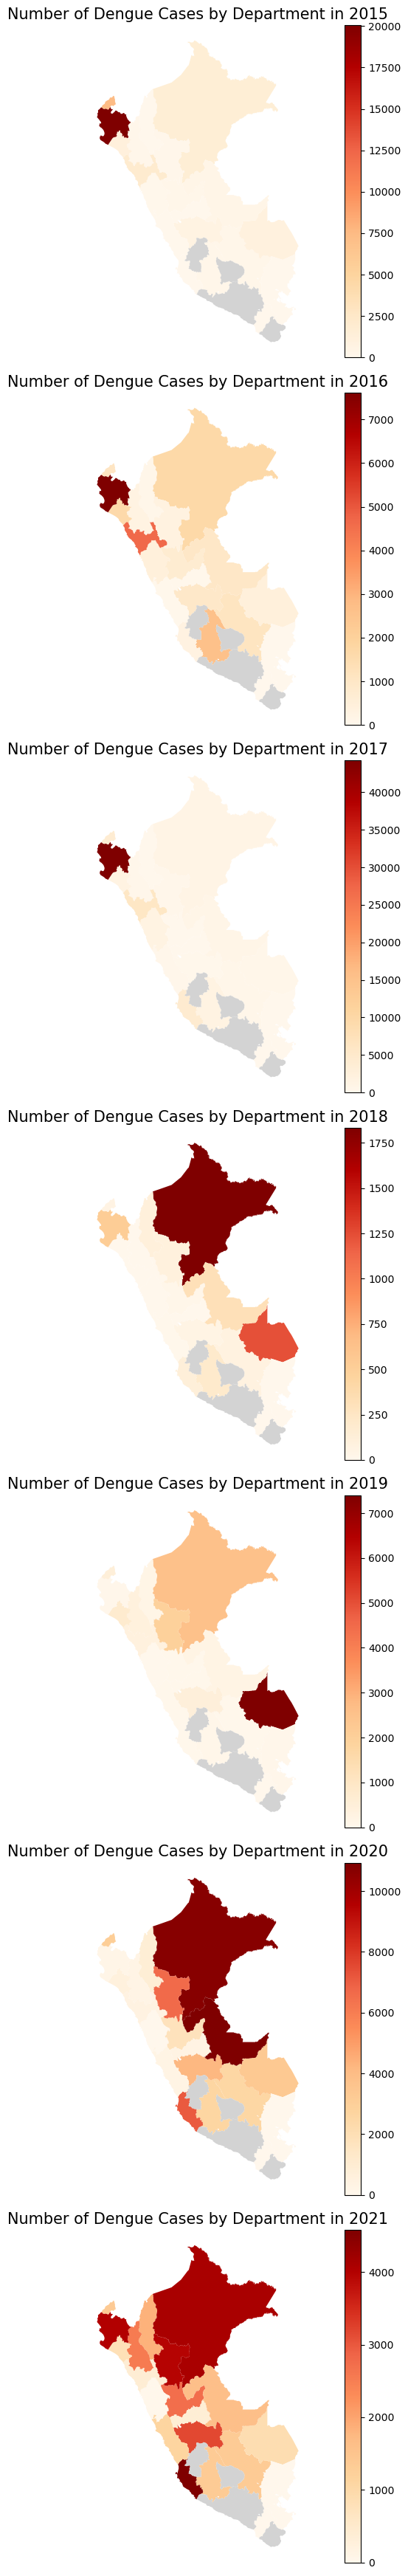

In [6]:
# Aggregate the shapefile data to the department level
departments_gdf = districts_gdf.dissolve(by='CCDD')

# Set up a list of years
years = sorted(df['Año'].unique())

# Set up the subplots for each year
fig, axes = plt.subplots(nrows=len(years), figsize=(10, 5 * len(years)))

# Ensure axes is iterable, even for a single subplot
if len(years) == 1:
    axes = [axes]

# Iterate over the years and create a plot for each year
for i, year in enumerate(years):
    # Filter the data for the specific year
    df_year = df[df['Año'] == year]

    # Aggregate the number of cases by department for the year
    cases_by_department = df_year.groupby('Departamento_Ubigeo')['Casos'].sum().reset_index()

    # Merge the aggregated cases data with the department shapefile
    merged_gdf = departments_gdf.merge(cases_by_department, left_on='CCDD', right_on='Departamento_Ubigeo', how='left')

    # Plot the map for the specific year
    merged_gdf.plot(column='Casos', cmap='OrRd', legend=True,
                    missing_kwds={"color": "lightgrey", "label": "No data"},
                    ax=axes[i])

    # Set title for each subplot
    axes[i].set_title(f'Number of Dengue Cases by Department in {year}', fontsize=15)
    axes[i].set_axis_off()  # Turn off the axis

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

6. Use geopandas to plot the number of cases by the department for all 2021 quarters using subplots. Every subplot for each quarter. Use a categorical legend with 5 bins. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level. Hint: Use Semana variable to group by quarters.

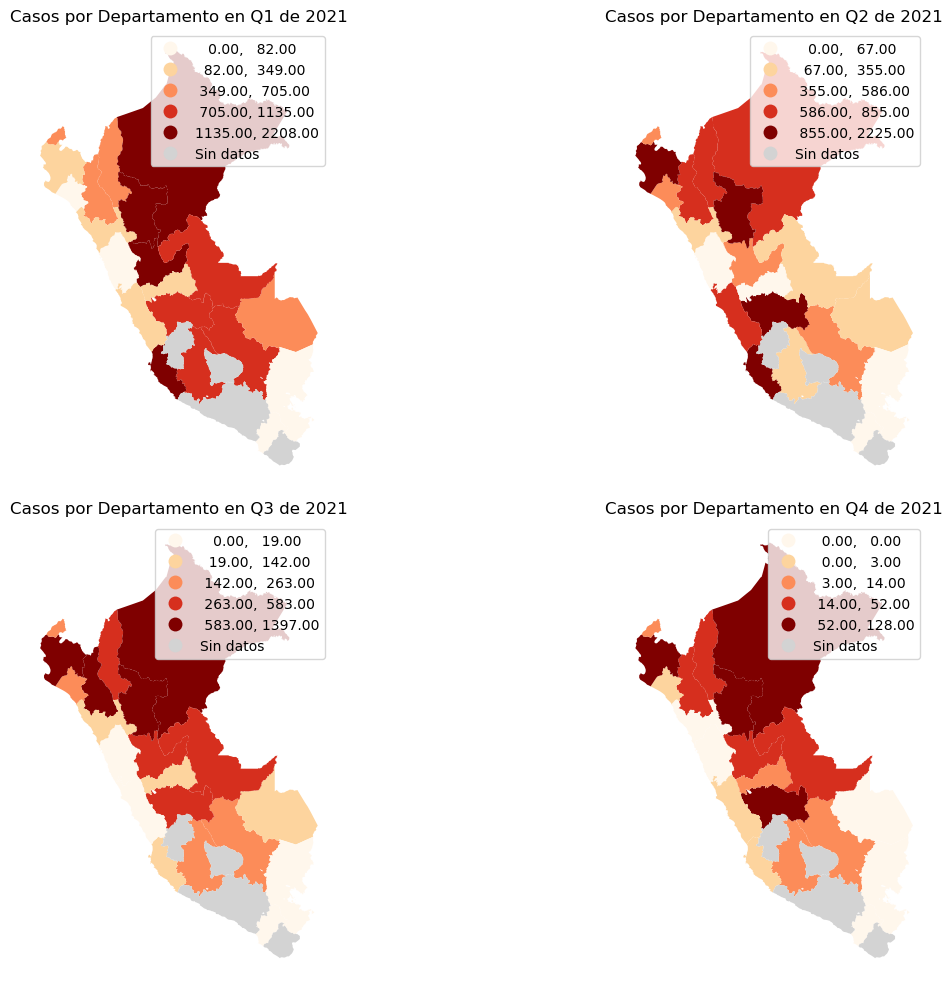

In [7]:
# Create a new column for quarters based on the variable 'Semana'
df_2021 = df_2021.copy()  # Ensure we're working with a copy
df_2021['Trimestre'] = pd.cut(df_2021['Semana'], bins=[0, 13, 26, 39, 52], labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Set up the figure and subplots on a 2x2 grid (for the 4 quarters)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Ensuring 'axes' is iterable as a flat list
axes = axes.flatten()

# Iterate over each quarter and create a chart
for i, trimestre in enumerate(['Q1', 'Q2', 'Q3', 'Q4']):
    # Filter data by quarter
    df_trim = df_2021[df_2021['Trimestre'] == trimestre].copy()  # Use .copy() to avoid the warning

    # Add the number of cases by department for the quarter
    cases_by_department = df_trim.groupby('Departamento_Ubigeo')['Casos'].sum().reset_index()

    # Combine aggregated case data with geographic data of departments
    merged_gdf = departments_gdf.merge(cases_by_department, left_on='CCDD', right_on='Departamento_Ubigeo', how='left')

    # Plot the map for the quarter with a 5-bin categorical legend
    merged_gdf.plot(column='Casos', cmap='OrRd', legend=True, scheme='Quantiles', k=5,
                    missing_kwds={"color": "lightgrey", "label": "Sin datos"},
                    ax=axes[i])

    # Add a title for each subplot
    axes[i].set_title(f'Casos por Departamento en {trimestre} de 2021', fontsize=12)
    axes[i].set_axis_off()  # Disable axes

# Adjust the layout to avoid overlaps
plt.tight_layout()

# Show the plot
plt.show()